In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
yf.pdr_override()
from scipy.stats import norm
%matplotlib inline

In [ ]:
ticker ='PG'
data = pd.DataFrame()
data[ticker] = pdr.get_data_yahoo(ticker,start = '2007-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
log_returns = np.log(1+data.pct_change())

<Axes: xlabel='Date'>

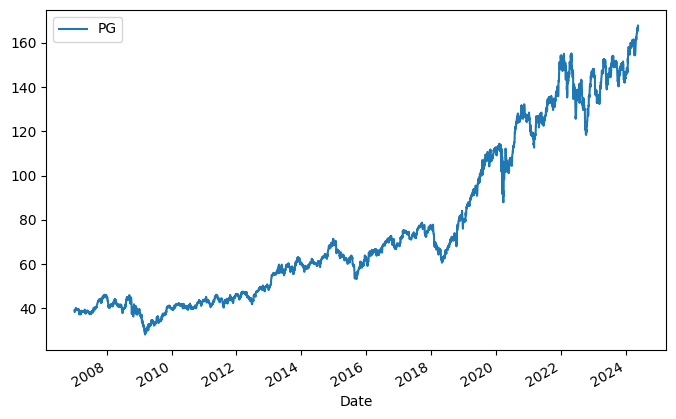

In [ ]:
data.plot(figsize=(8,5))

<Axes: xlabel='Date'>

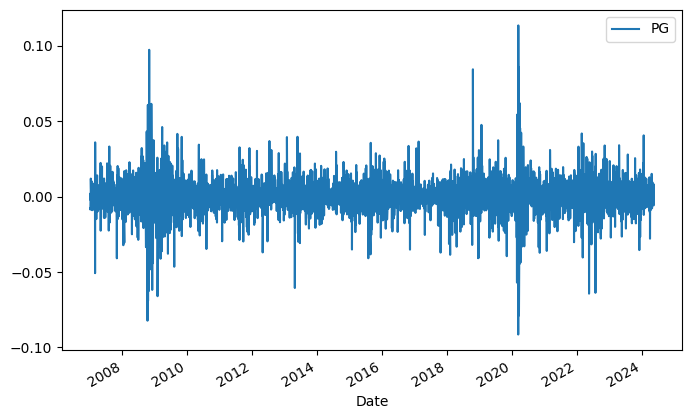

In [ ]:
log_returns.plot(figsize=(8,5))

to calculate the stock price, we need to get R value from brownian motion formula :
- BM : r = drift + std_dev * Z
- Z = corresponds to the dist b/w mean & the events,expressed as the no. of std deviations
- drift = u - 1/2 * var
- daily returns = e^r


In [ ]:
var = log_returns.var()

In [ ]:
u = log_returns.mean()

In [ ]:
stdev = log_returns.std()

In [ ]:
drift = u - (0.5 * var)

In [22]:
type(drift)

pandas.core.series.Series

Converting the values in a numpy array

In [24]:
drift.values, stdev.values

(array([0.00026506]), array([0.01165818]))

For Z = SciPy's method norm.ppf() takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at.

In [25]:
norm.ppf(0.95)

1.6448536269514722

Random rand takes random values from 0 to 1 in the specified shape

In [26]:
x = np.random.rand(10,2)
x

array([[0.30150554, 0.03157599],
       [0.595294  , 0.98250495],
       [0.53620142, 0.37738609],
       [0.94838201, 0.01594658],
       [0.2053548 , 0.11486274],
       [0.6108687 , 0.67710591],
       [0.19461963, 0.90665874],
       [0.73892595, 0.44108435],
       [0.55891896, 0.62190471],
       [0.48851125, 0.7788176 ]])

here we get the distances from the mean 0 as measured by the no. of std deviations for values in x

In [27]:
norm.ppf(x)

array([[-0.52007533, -1.85811997],
       [ 0.24118466,  2.10847305],
       [ 0.0908684 , -0.3123531 ],
       [ 1.62936403, -2.145747  ],
       [-0.82264551, -1.2010663 ],
       [ 0.28158388,  0.45962114],
       [-0.86099781,  1.3204569 ],
       [ 0.64003768, -0.14822056],
       [ 0.14822896,  0.31048707],
       [-0.02880202,  0.76820602]])

Now we calc Z

In [29]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 1.05646105,  1.79895109],
       [-0.97047239,  0.75646198],
       [ 1.87641319, -0.33566549],
       [-1.49926325, -1.31062532],
       [ 0.83250402,  0.01924763],
       [ 0.04642817,  0.83487108],
       [ 1.22414494, -1.46696135],
       [ 0.92731439, -0.49297436],
       [-0.18438448,  0.7359464 ],
       [ 0.20968924, -0.36272676]])

In [30]:
t_intervals = 1000
iterations = 10

Calc daily_returns
- we take numpy's exp() func for  : e^exp

In [33]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))

we get 1000 x 10 matrix array with 10 sets of random future stock prices

In [34]:
daily_returns

array([[0.98685238, 1.0055985 , 0.99247704, ..., 0.9927718 , 0.99404523,
        0.99650268],
       [1.00130191, 1.00191709, 0.98842793, ..., 1.00887324, 0.98526124,
        0.99890559],
       [0.99089087, 1.01006547, 0.98068871, ..., 1.00071644, 0.98004833,
        1.02033027],
       ...,
       [1.00217764, 1.00916613, 1.00158392, ..., 0.98365656, 1.00398479,
        0.99806639],
       [1.0225529 , 1.00506923, 1.00618242, ..., 0.99090703, 0.99269864,
        0.98792718],
       [1.00872843, 1.00843089, 0.99019526, ..., 0.99889116, 1.00756206,
        1.01539442]])

calculating the price list :    
- s(t) = s0 + daily_returns(t)
- s(t+1) = s(t) + daily_returns(t+1)
- s(t+999) = s(t+998) + daily_returns(t+999)

for s0 we take the last value of the stock adj close prices(today)

In [36]:
s0 = data.iloc[-1]
s0

PG    167.639999
Name: 2024-05-17 00:00:00, dtype: float64

we want the price list with the same dimension like daily_returns

we fill it with 0s and the append those with the help of a loop

In [37]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
price_list[0] = s0
price_list

array([[167.63999939, 167.63999939, 167.63999939, ..., 167.63999939,
        167.63999939, 167.63999939],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

here I implement the formula for the price list = s(t) = s(t-1) x daily_returns(t)

In [39]:
for i in range(1,t_intervals):
    price_list[i] = price_list[i-1] * daily_returns[i]

In [40]:
price_list

array([[167.63999939, 167.63999939, 167.63999939, ..., 167.63999939,
        167.63999939, 167.63999939],
       [167.85825163, 167.96138112, 165.70005757, ..., 169.1275099 ,
        165.16919439, 167.45653319],
       [166.3292092 , 169.65199179, 162.50017608, ..., 169.24868001,
        161.87379299, 170.86096905],
       ...,
       [200.81041393, 387.26165012, 283.36426696, ..., 191.07370279,
        145.5464975 , 199.31790989],
       [205.33927122, 389.22476666, 285.11614328, ..., 189.33627505,
        144.48381069, 196.91158006],
       [207.13156013, 392.50627723, 282.32065359, ..., 189.12633209,
        145.57640656, 199.94291975]])

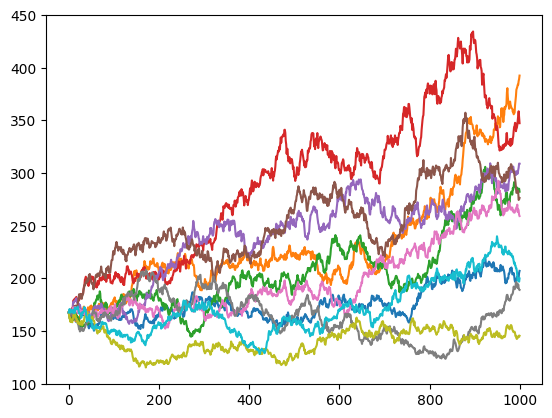

In [41]:
plt.plot(price_list)

above I get the projections of the stock price from the today's price over 10 iterations and one can interpret the values the way they like to.